# Import Essential Packages

In [2]:
import pandas as pd
import numpy as np
import math  
import random  
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, Perceptron, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import PredictionErrorDisplay
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import LabelEncoder
import warnings

# Import Dataset

In [3]:
bike_data=pd.read_csv("/Users/rohithlingala/Documents/Academics/Datascience/scalation_2.0/data/BikeData.csv", sep=",",encoding = "ISO-8859-1")
print(bike_data.dtypes)
bike_data.head(15)

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


# Exploratory Analysis

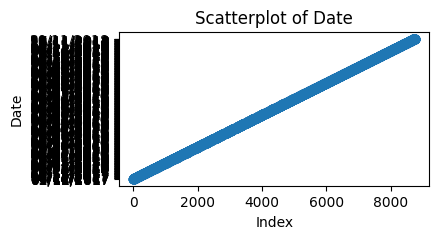

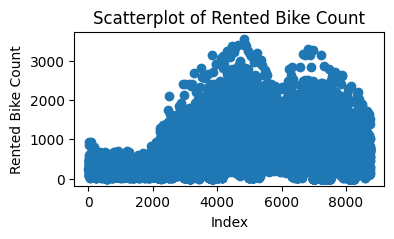

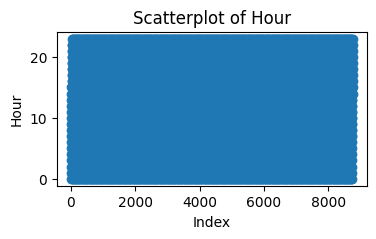

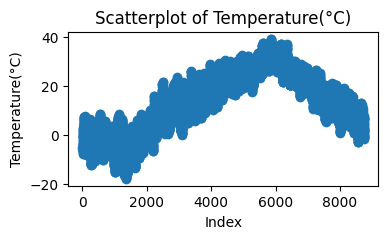

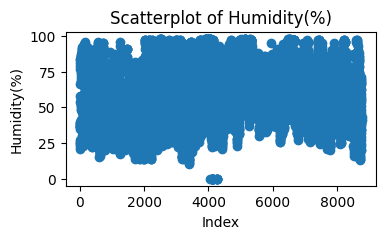

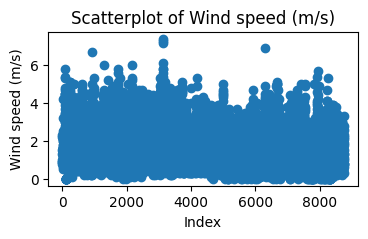

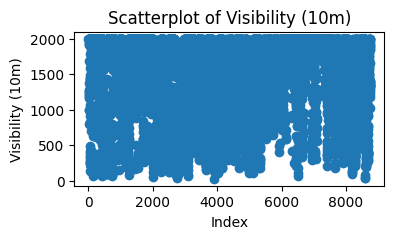

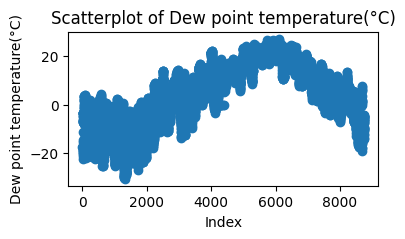

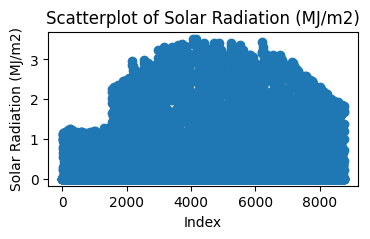

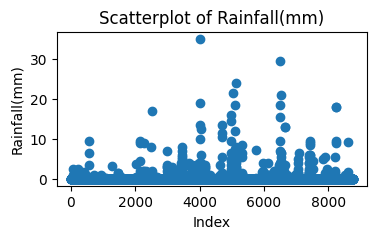

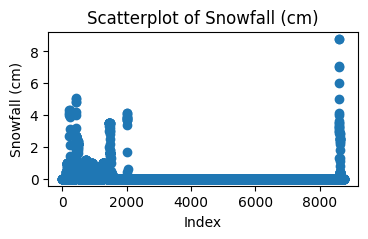

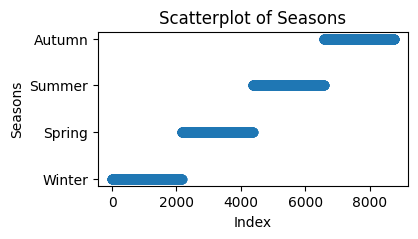

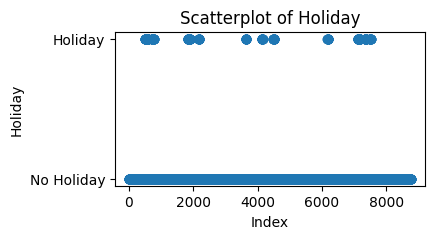

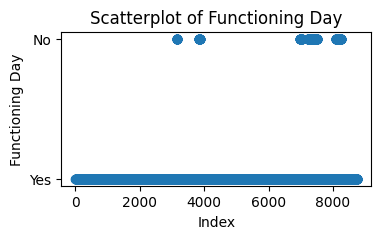

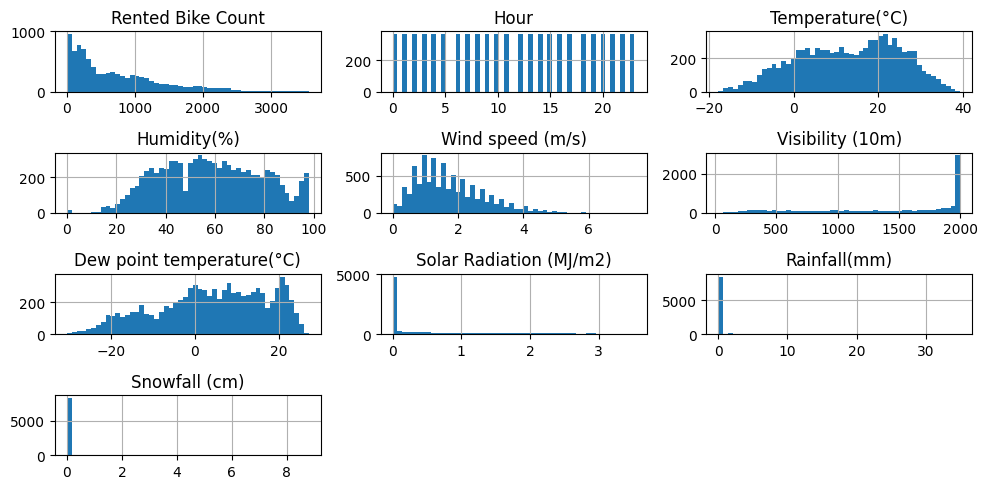

In [4]:
for column in bike_data:
    plt.figure(figsize=(4,2))
    plt.scatter(bike_data.index, bike_data[column])
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title("Scatterplot of " + column)
    plt.show()
    
bike_data.hist(bins = 50, figsize = (10,5))
plt.tight_layout()
plt.show()



In [5]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data Preprocessing

In [6]:
bike_data.replace("?", np.NaN, inplace = True) # replace "?" with np.Nan
null_values = bike_data.isnull().sum() 
print(null_values)

print ()
print("-"*50)

df = bike_data.copy()



def f(x):
    if (x > 5) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Afternoon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 5):
        return'Night'
    
b = [0,5,8,12,16,20]
l = ['Early Morning','Morning','Afternoon','Evening','Night']
df["hourOfDay"] = pd.cut(df['Hour'], bins=b, labels=l, include_lowest=True)

df.drop("Hour",axis=1, inplace=True)
df.drop("Date", axis = 1, inplace = True) # Date column is useless in prediction

print()
print("-"*50)

#Converting string to numerical data

label_encoder = LabelEncoder()
df["Seasons"]=label_encoder.fit_transform(pd.Categorical(df["Seasons"],categories=['Winter','Spring','Summer','Autumn'],ordered=True))
df["Holiday"]=label_encoder.fit_transform(pd.Categorical(df["Holiday"],categories=['No Holiday','Holiday']))
df["Functioning Day"]=label_encoder.fit_transform(pd.Categorical(df["Functioning Day"],categories=['No', 'Yes']))
df["hourOfDay"]=label_encoder.fit_transform(df["hourOfDay"])


#df["Seasons"] = pd.Categorical(df["Seasons"],categories=['Winter','Spring','Summer','Autumn'],ordered=True)
#df["Holiday"] = pd.Categorical(df["Holiday"],categories=['No Holiday','Holiday']
#df["Functioning Day"] = pd.Categorical(df["Functioning Day"],categories=['No', 'Yes'])

#df['Functioning Day'] = df['Functioning Day'].cat.codes
#df['Holiday'] = df['Holiday'].cat.codes
#df['Seasons'] = df['Seasons'].cat.codes
#df['hourOfDay'] = df['hourOfDay'].cat.codes


print(df.dtypes)


print("-"*50)


#To find the outliers by using Z score
def find_outliers_z_score(df : pd.DataFrame) -> []:
    outliers_index =[]
    for column in ["Temperature(°C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)",
                   "Solar Radiation (MJ/m2)","Snowfall (cm)","Rainfall(mm)"]:
        mean = df[column].mean()
        std_deviation = df[column].std()
        z_scores = (df[column] - mean) / std_deviation
        outliers = df[np.abs(z_scores) > 3]
        outliers_index.extend(df.index[np.abs(z_scores) > 3])
        print("Outliers for Column: ",column)
        if len(outliers) > 0:
            print(outliers)
        else:
            print("No outliers")
    return outliers_index
#To remove Outliers using z score
def remove_outliers(df: pd.DataFrame, lst: []) ->pd.DataFrame:
    lst=sorted(set(lst))
    df=df.drop(lst)
    return df


print("-"*50)
print("Outliers according to Z score") # outliers are points with a z score greater than 3
outliers_index=find_outliers_z_score(bike_data)
#bike_data=remove_outliers(bike_data,outliers_index)
print("Count ",len(outliers_index))

print()
print("-"*50)


df.to_csv("Bike Data.csv")
print(df.describe())
df.head(200)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

--------------------------------------------------

--------------------------------------------------
Rented Bike Count              int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                        int64
Holiday                        int64
Functioning Day                int64
hourO

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,hourOfDay
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,169,-4.3,47,0.6,1992,-13.9,0.0,0.0,0.0,3,1,1,1
196,96,-4.3,49,0.7,2000,-13.4,0.0,0.0,0.0,3,1,1,1
197,56,-4.7,49,0.8,1999,-13.8,0.0,0.0,0.0,3,1,1,1
198,76,-5.1,53,0.9,1975,-13.2,0.0,0.0,0.0,3,1,1,3


# check variance, covariance and multicollinearity

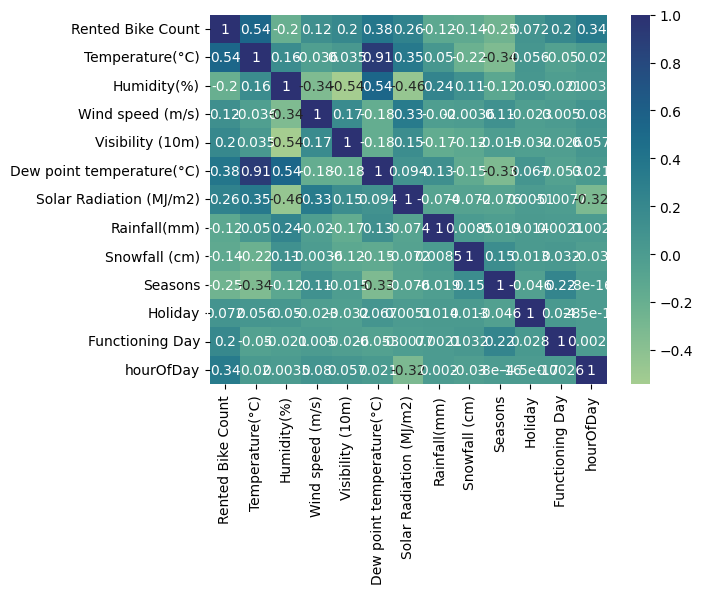

                                Variance
Rented Bike Count          416021.733390
Temperature(°C)               142.678850
Humidity(%)                   414.627875
Wind speed (m/s)                1.073918
Visibility (10m)           370027.323001
Dew point temperature(°C)     170.573247
Solar Radiation (MJ/m2)         0.754720
Rainfall(mm)                    1.272819
Snowfall (cm)                   0.190747
Seasons                         1.241906
Holiday                         0.046888
Functioning Day                 0.032545
hourOfDay                       2.771150
----------------------------------------------------------------------
                          Rented Bike Count Temperature(°C)  Humidity(%)   
Rented Bike Count              416021.73339     4149.257754 -2623.853782  \
Temperature(°C)                 4149.257754       142.67885    38.763038   
Humidity(%)                    -2623.853782       38.763038   414.627875   
Wind speed (m/s)                  80.950203       -

In [7]:
def check_variance(df : pd.DataFrame) -> pd.DataFrame:
    # create pd.DataFrame to store the column names and their variance with each other
    variance_df = pd.DataFrame(columns = ["Variance"], index=df.columns)
    variance_df.fillna(0, inplace=True)
    for colName in df.columns:
        variance_df.loc[colName, "Variance"] = df[colName].var()
    return variance_df
        

def check_covariance(df : pd.DataFrame) -> pd.DataFrame:
    covariance_df = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            covariance_df.loc[col1, col2] = df[col1].cov(df[col2])
    return covariance_df

def check_multicollinearity(df: pd.DataFrame):
    # VIF dataframe
    collinear_data = pd.DataFrame()
    collinear_data["feature"] = df.columns
  
    # calculating VIF for each feature
    collinear_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
  
    return collinear_data

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()
    
print(check_variance(df.select_dtypes(include=[np.number])))
print("-" * 70)
print(check_covariance(df.select_dtypes(include=[np.number]))) 
print("-" * 70)
print(check_multicollinearity(df.select_dtypes(include=[np.number]))) 




In [8]:
def shuffle_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    # add a random seed to ensure randomness
    random.seed(42)
    # shuffle the indices of the pd.DataFrame
    df = df.reindex(np.random.permutation(df.index))
    # df.index = current values of indices of a pd.DataFrame. returns an array
    # np.random.permutation(df.index) = shuffles the supplied array
    # df.reindex(np.random.permutation(df.index)) = applied the shuffled indices to the pd.DataFrame object
    return df


# define adjusted r2 function
def adjusted_r2_score(XTest: pd.DataFrame, r2: float) -> float:
    n = XTest.shape[0]  # number of rows
    p = XTest.shape[1]  # number of columns
    adj_r2 = 1 - (1 - r2) * (n - 1) / (
        n - p - 1
    )  # adjusted r squared formula, applies penalty to the use of extra parameters
    return adj_r2

In [9]:

X = pd.DataFrame(df.drop(["Rented Bike Count","Dew point temperature(°C)"], axis=1))
y = pd.DataFrame(df[["Rented Bike Count"]])


    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=True, shuffle=True
)

# Define a function to calculate adjusted R-squared
def adj_r2_score(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# Turn off warnings
warnings.filterwarnings("ignore")  # category = UserWarning

# In-Sample Quality of Fit

In [10]:

# First a simple linear model
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X, y)
# make predictions on the test data
y_predictions = linearRegressionModel.predict(X)

# r2 score
r2 = r2_score(y, y_predictions)
# calculate adjusted r2
adj_r2 = adjusted_r2_score(X, r2)
# print metrics
print("Linear Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()

# create a lasso regression model
lassoRegressionModel = Lasso()
# fit the model to the training data
lassoRegressionModel.fit(X, y)
# make predictions on the test data
y_predictions = lassoRegressionModel.predict(X)
# evaluate the model using R^2
r2 = r2_score(y, y_predictions)
adj_r2 = adjusted_r2_score(X, r2)
print("Lasso Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()

# create a ridge regression model
ridgeRegressionModel = Ridge()
# fit the model to the training data
ridgeRegressionModel.fit(X, y)
# make predictions on the test data
y_predictions = ridgeRegressionModel.predict(X)
# evaluate the model using R^2
r2 = r2_score(y, y_predictions)
adj_r2 = adjusted_r2_score(X, r2)
print("Ridge Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()

#create a symbolic Regression
symbolicRegressionModel = SymbolicRegressor(population_size=1000, generations=20, tournament_size=5, n_jobs=-1)
symbolicRegressionModel.fit(X, y)
y_predictions = symbolicRegressionModel.predict(X)
# evaluate the model using R^2
r2 = r2_score(y, y_predictions)
adj_r2 = adjusted_r2_score(X, r2)
print("Symbolic Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()


#create a transformed Regression
transformedRegressionModel = TransformedTargetRegressor(regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1)
# fit the model to the training data
transformedRegressionModel.fit(X, y)
# make predictions on the test data
y_predictions = transformedRegressionModel.predict(X)
# evaluate the model using R^2
r2 = r2_score(y, y_predictions)
adj_r2 = adjusted_r2_score(X, r2)
print("Transformed ridge Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()




Linear Regression
R2: 0.5674513444814331
Adjusted R2: 0.5669074447088331

Lasso Regression
R2: 0.5672949656297792
Adjusted R2: 0.5667508692216776

Ridge Regression
R2: 0.5674504571723655
Adjusted R2: 0.5669065562840363

Symbolic Regression
R2: 0.3133610711642624
Adjusted R2: 0.31249767059073785

Transformed ridge Regression
R2: 0.4952383163623114
Adjusted R2: 0.49460361374228234



# Validation (80-20 train-test-split)


In [11]:

# create a linear regression model
linearRegressionModel = LinearRegression()
# fit the model to the training data
linearRegressionModel.fit(X_train, y_train)
# make predictions on the test data
y_predictions = linearRegressionModel.predict(X_test)
# calculate r2
r2 = r2_score(y_test, y_predictions)
# calculate adjusted r2
adj_r2 = adjusted_r2_score(X_train, r2)
# print metrics
print("Linear Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()



# create a lasso regression model
lassoRegressionModel = Lasso()
# fit the model to the training data
lassoRegressionModel.fit(X_train, y_train)
# make predictions on the test data
y_predictions = lassoRegressionModel.predict(X_test)
# calculate r2
r2 = r2_score(y_test, y_predictions)
# calculate adjusted r2
adj_r2 = adjusted_r2_score(X_train, r2)
print("Lasso Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()


# create a ridge regression model
ridgeRegressionModel = Ridge()
# fit the model to the training data
ridgeRegressionModel.fit(X_train, y_train)
# make predictions on the test data
y_predictions = ridgeRegressionModel.predict(X_test)
# calculate r2
r2 = r2_score(y_test, y_predictions)
# calculate adjusted r2
adj_r2 = adjusted_r2_score(X_train, r2)

print("Ridge Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()


#create a symbolic Regression
symbolicRegressionModel = SymbolicRegressor()
symbolicRegressionModel.fit(X_train, y_train)
y_predictions = symbolicRegressionModel.predict(X_test)
# evaluate the model using R^2
r2 = r2_score(y_test, y_predictions)
adj_r2 = adjusted_r2_score(X_train, r2)
print("Symbolic Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()


#create a transformed Regression
transformedRegressionModel = TransformedTargetRegressor(regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1)
# fit the model to the training data
transformedRegressionModel.fit(X_train, y_train)
# make predictions on the test data
y_predictions = transformedRegressionModel.predict(X_test)
# evaluate the model using R^2
r2 = r2_score(y_test, y_predictions)
adj_r2 = adjusted_r2_score(X_train, r2)
print("Transformed ridge Regression")
print("R2:", r2)
print("Adjusted R2:", adj_r2)
print()


Linear Regression
R2: 0.5658716656408292
Adjusted R2: 0.5651890739201387

Lasso Regression
R2: 0.5656718711768154
Adjusted R2: 0.5649889653138859

Ridge Regression
R2: 0.565857073135249
Adjusted R2: 0.5651744584703673

Symbolic Regression
R2: 0.45685431922101716
Adjusted R2: 0.4560003165782829

Transformed ridge Regression
R2: 0.4698583740783847
Adjusted R2: 0.4690248180627846



# Validation (80-20 train-test-split), 5x Cross-Validation Quality of Fit

In [12]:
X = df.drop(["Rented Bike Count","Dew point temperature(°C)"], axis=1)
y = df["Rented Bike Count"]


kf = KFold(n_splits=5, random_state = True, shuffle = True) # 5 fold cross validation: KFold(n_splits=5, random_state=None, shuffle=False)
# n_splits = 5: number of splits is 5, so 20% of data is going to be used for the training and testing partitions (20% test, 20% + 20% + 20% + 20% train) )
# random_state = True: sets a random seet to ensure results are reproducible
# shuffle = True: Shuffles the data prior to creating the KFold partitions 

# create lists to hold performance metrics
# Create DataFrames for predicted and actual variables for statistical summaries of actual vs estimated
linear_R2 = []
linear_adj_R2 = []
linear_regression_predicted = pd.DataFrame(columns = ["Predicted"], dtype = "int64")

lasso_R2 = []
lasso_regression_adj_R2 = []
lasso_regression_predicted = pd.DataFrame(columns = ["Predicted"], dtype = "int64")

ridge_R2 = []
ridge_regression_adj_R2 = []
ridge_regression_predicted = pd.DataFrame(columns = ["Predicted"], dtype = "int64")

symbolic_R2 = []
symbolic_regression_adj_R2 = []
symbolic_regression_predicted = pd.DataFrame(columns = ["Predicted"], dtype = "int64")

transformed_R2 = []
transformed_regression_adj_R2 = []
transformed_regression_predicted = pd.DataFrame(columns = ["Predicted"], dtype = "int64")

perceptron_R2 = []
perceptron_adj_R2 = []
perceptron_predicted = pd.DataFrame(columns = ["Predicted"], dtype = "int64")

actualdf = y

for train_index, test_index in kf.split(X): # training and testing indices are newly generated per iteration
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #pd.DataFrame.iloc[indices] is used to grab specific index values
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] #pd.DataFrame.iloc[indices] is used to grab specific index values
        
    # create a linear regression model
    linearRegressionModel = LinearRegression()
    # fit the model to the training data
    linearRegressionModel.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = linearRegressionModel.predict(X_test)
    # calculate r2 and adjusted r2
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(X_train, r2)
    # append r2 and adjusted r2 to correct model list
    linear_R2.append(r2)
    linear_adj_R2.append(adj_r2)
    
    # Add predicted values to linear_regression_predicted DataFrame
    pd.concat([linear_regression_predicted,pd.DataFrame({"Predicted": y_pred})])
    
    # create a lasso regression model
    lassoRegressionModel = Lasso()
    # fit the model to the training data
    lassoRegressionModel.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = lassoRegressionModel.predict(X_test)
    # calculate r2 and adjusted r2
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(X_train, r2)
    # append r2 and adjusted r2 to correct model list
    lasso_R2.append(r2)
    lasso_regression_adj_R2.append(adj_r2)
    # Add predicted values to linear_regression_predicted DataFrame
    pd.concat([lasso_regression_predicted,pd.DataFrame({"Predicted": y_pred})])
    
    # create a ridge regression model
    ridgeRegressionModel = Ridge()
    # fit the model to the training data
    ridgeRegressionModel.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = ridgeRegressionModel.predict(X_test)
    # calculate r2 and adjusted r2
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(X_train, r2)
    # append r2 and adjusted r2 to correct model list
    ridge_R2.append(r2)
    ridge_regression_adj_R2.append(adj_r2)
    # Add predicted values to linear_regression_predicted DataFrame
    pd.concat([ridge_regression_predicted,pd.DataFrame({"Predicted": y_pred})])
    
    #create a symbolic Regression
    symbolicRegressionModel = SymbolicRegressor()
    # fit the model to the training data
    symbolicRegressionModel.fit(X_train, y_train)
    y_pred = symbolicRegressionModel.predict(X_test)
    # evaluate the model using R^2
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(X_train, r2)
    # append r2 and adjusted r2 to correct model list
    symbolic_R2.append(r2)
    symbolic_regression_adj_R2.append(adj_r2)
    # Add predicted values to linear_regression_predicted DataFrame
    pd.concat([symbolic_regression_predicted,pd.DataFrame({"Predicted": y_pred})])


    #create a transformed Regression
    transformedRegressionModel = TransformedTargetRegressor(regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1)
    # fit the model to the training data
    transformedRegressionModel.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = transformedRegressionModel.predict(X_test)
    # evaluate the model using R^2
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(X_train, r2)
    # append r2 and adjusted r2 to correct model list
    transformed_R2.append(r2)
    transformed_regression_adj_R2.append(adj_r2)
    # Add predicted values to linear_regression_predicted DataFrame
    pd.concat([transformed_regression_predicted,pd.DataFrame({"Predicted": y_pred})])

    #create a Pereptron
    perceptronModel = MLPRegressor(random_state=1, max_iter=1000)
    # fit the model to the training data
    perceptronModel.fit(X_train,y_train)
    # make predictions on the test data
    y_pred = perceptronModel.predict(X_test)
    # evaluate the model using R^2
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(X_train, r2)
    # append r2 and adjusted r2 to correct model list
    perceptron_R2.append(r2)
    perceptron_adj_R2.append(adj_r2)
    # Add predicted values to linear_regression_predicted DataFrame
    pd.concat([perceptron_predicted,pd.DataFrame({"Predicted": y_pred})])



print()

print("Average Performance Linear Regression")
print("R^2:", sum(linear_R2)/len(linear_R2))
print("Adjusted R^2:", sum(linear_adj_R2)/len(linear_adj_R2))
print()
print("-" * 70)

print("Average Performance Lasso Regression")
print("R^2:", sum(lasso_R2)/len(lasso_R2))
print("Adjusted R^2:", sum(lasso_regression_adj_R2)/len(lasso_regression_adj_R2))
print()
print("-" * 70)

print("Average Performance Ridge Regression")
print("R^2:", sum(ridge_R2)/len(ridge_R2))
print("Adjusted R^2:", sum(ridge_regression_adj_R2)/len(ridge_regression_adj_R2))
print()
print("-" * 70)

print("Average Performance Symbolic Regression")
print("R^2:", sum(symbolic_R2)/len(symbolic_R2))
print("Adjusted R^2:", sum(symbolic_regression_adj_R2)/len(symbolic_regression_adj_R2))
print()
print("-" * 70)


print("Average Performance Transformed Regression")
print("R^2:", sum(transformed_R2)/len(symbolic_R2))
print("Adjusted R^2:", sum(transformed_regression_adj_R2)/len(transformed_regression_adj_R2))
print()
print("-" * 70)

print("Average Performance Perceptron")
print("R^2:", sum(perceptron_R2)/len(symbolic_R2))
print("Adjusted R^2:", sum(perceptron_adj_R2)/len(perceptron_adj_R2))
print()
print("-" * 70)



Average Performance Linear Regression
R^2: 0.5659431358475204
Adjusted R^2: 0.5652606565013687

----------------------------------------------------------------------
Average Performance Lasso Regression
R^2: 0.5658236397347
Adjusted R^2: 0.5651409725015785

----------------------------------------------------------------------
Average Performance Ridge Regression
R^2: 0.5659432615730864
Adjusted R^2: 0.5652607824246164

----------------------------------------------------------------------
Average Performance Symbolic Regression
R^2: 0.42622030123284754
Adjusted R^2: 0.4253181318951634

----------------------------------------------------------------------
Average Performance Transformed Regression
R^2: 0.49387116941136383
Adjusted R^2: 0.49307536936326857

----------------------------------------------------------------------
Average Performance Perceptron
R^2: 0.6774274822176917
Adjusted R^2: 0.6769202927243232

----------------------------------------------------------------------

# Plots

In [13]:
# Plot of the best model

columns = X.columns
columnCombos = []

for i in range(2, len(columns)+1):
    columnCombos.extend(list(itertools.combinations(columns, i)))
    # itertools.combination(iterable, length of iterable) generates all unqiue combiation of an iterable at length
    # list() casts the iterools object into a list so we can extend columnCombos
    # list.extend adds multiple elements to the end of a list
print(columnCombos)
linearRegressionR2 = {}
linearRegressionadjustedR2 = {}
linearRegressionCVR2 = {}
for combination in columnCombos:
    combination = list(combination) # cast combination from tuple to list
    xdf = pd.DataFrame() # create a blank DataFrame
    xdf = xdf.append(df[combination]) # append the unique combination of columns to the blank DataFrame
    X = xdf
    y = df["Rented Bike Count"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
    linearRegressionModel = LinearRegression() # create a linear regression model
    linearRegressionModel.fit(X_train, y_train) # fit the model to the training data
    y_predictions = linearRegressionModel.predict(X_test) # make predictions on the test data
    r2 = r2_score(y_test, y_predictions) # calculate r2
    adj_r2 = adjusted_r2_score(X_train, r2) # calculate adjusted r2
    cv_r2_scores = cross_val_score(linearRegressionModel, X_train, y_train, cv=5, scoring='r2')
    cv_r2 = np.mean(cv_r2_scores)
    # append column combination and calculated metrics to respective dictionaries 
    linearRegressionR2[str(combination)] = r2
    linearRegressionadjustedR2[str(combination)] = adj_r2
    linearRegressionCVR2[str(combination)] = cv_r2
    mse = mean_squared_error(y_test, y_predictions)
    sse = mse * len(y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_predictions)


with open("./airfoil_sum.txt", "a") as file:
    print("\n", file=file)
    print("---------- Best performances below ----------", file=file)
    print("-" * 45, file=file)
    print("Column combination", file=file)
    print([key for key, value in linearRegressionR2.items() if value == max(linearRegressionR2.values())][0], file=file)
    print("R2:", max(linearRegressionR2.values()), file=file)
    print("-" * 45, file=file)
    print("Column combination", file=file)
    print([key for key, value in linearRegressionadjustedR2.items() if value == max(linearRegressionadjustedR2.values())][0], file=file)
    print("Adjusted R2:", max(linearRegressionadjustedR2.values()), file=file)
    print("-" * 45, file=file)
    print("Column combination", file=file)
    print([key for key, value in linearRegressionCVR2.items() if value == max(linearRegressionCVR2.values())][0], file=file)
    print("CV R2:", max(linearRegressionCVR2.values()), file=file)
    print("-" * 45, file=file)
    print("Mean Squared Error", file=file)
    print(mse, file=file)
    print("-" * 45, file=file)
    print("Sum of Squared Error", file=file)
    print(sse, file=file)
    print("-" * 45, file=file)
    print("Root Mean Squared Error", file=file)
    print(rmse, file=file)
    print("-" * 45, file=file)
    print("Mean Absolute Error", file=file)
    print(mse, file=file)
    print("-" * 45, file=file)


# create a visualization tracking all R2 and adjusted R2 generated
num_params = [len(eval(key)) for key in linearRegressionR2.keys()] # get the number of parameters for each column combination
r2_values = list(linearRegressionR2.values()) # cast all R2 values of linearRegressionR2 dictionary into a list
adj_r2_values = list(linearRegressionadjustedR2.values()) # cast all R2 values of linearRegressionadjustedR2 dictionary into a list
cv_r2_values = list(linearRegressionCVR2.values()) # cast all CV R2 values of linearRegressionCVR2 dictionary into a list

plt.scatter(num_params, r2_values, label = "R^2") # plot the number of parameters against R2
plt.scatter(num_params, adj_r2_values, label = "Adjusted R^2") # plot the number of parameters against adjusted R2
plt.scatter(num_params, cv_r2_values, label = "CV R^2") # plot the number of parameters against CV R2

# add a legend and labels to the scatterplot and show
plt.legend()
plt.xlabel("Number of Parameters")
plt.ylabel("R^2 / Adjusted R^2 / CV R^2")
plt.show()

# create a visualization averaging all R2 and adjusted R2 generated for their respective paramters used
for element in num_params:
    sumList = []
    for i in range(len(linearRegressionR2)):
        if len(eval(list(linearRegressionR2.keys())[i])) == element:
            sumList.append(float(list(linearRegressionR2.values())[i]))
    plt.scatter(element, sum(sumList)/len(sumList), label = "R^2", c = "red")

for element in num_params:
    sumList = []
    for i in range(len(linearRegressionadjustedR2)):
        if len(eval(list(linearRegressionadjustedR2.keys())[i])) == element:
            sumList.append(float(list(linearRegressionadjustedR2.values())[i]))
    plt.scatter(element, sum(sumList)/len(sumList), label = "Adjusted R^2", c = "blue")

for element in num_params:
    sumList = []
    for i in range(len(linearRegressionCVR2)):
        if len(eval(list(linearRegressionCVR2.keys())[i])) == element:
            sumList.append(float(list(linearRegressionCVR2.values())[i]))
    plt.scatter(element, sum(sumList)/len(sumList), label = "CV R^2", c = "green")

plt.title("R^2 (Red) vs Adjusted R^2 (Blue) vs CV R^2 (Green)")
plt.xlabel("Number of Parameters")
plt.ylabel("R^2 / Adjusted R^2 / CV R^2")
plt.savefig("./airfoil_r^2_plot.png")
plt.show()

x1 = np.linspace(0, 3500, 100)
y1 = x1
plt.scatter(y_predictions, y_test)
plt.plot(x1, y1, color = "red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values")
plt.savefig("./airfoil_actualvspredicted_plot.png")

plt.show()


[('Temperature(°C)', 'Humidity(%)'), ('Temperature(°C)', 'Wind speed (m/s)'), ('Temperature(°C)', 'Visibility (10m)'), ('Temperature(°C)', 'Solar Radiation (MJ/m2)'), ('Temperature(°C)', 'Rainfall(mm)'), ('Temperature(°C)', 'Snowfall (cm)'), ('Temperature(°C)', 'Seasons'), ('Temperature(°C)', 'Holiday'), ('Temperature(°C)', 'Functioning Day'), ('Temperature(°C)', 'hourOfDay'), ('Humidity(%)', 'Wind speed (m/s)'), ('Humidity(%)', 'Visibility (10m)'), ('Humidity(%)', 'Solar Radiation (MJ/m2)'), ('Humidity(%)', 'Rainfall(mm)'), ('Humidity(%)', 'Snowfall (cm)'), ('Humidity(%)', 'Seasons'), ('Humidity(%)', 'Holiday'), ('Humidity(%)', 'Functioning Day'), ('Humidity(%)', 'hourOfDay'), ('Wind speed (m/s)', 'Visibility (10m)'), ('Wind speed (m/s)', 'Solar Radiation (MJ/m2)'), ('Wind speed (m/s)', 'Rainfall(mm)'), ('Wind speed (m/s)', 'Snowfall (cm)'), ('Wind speed (m/s)', 'Seasons'), ('Wind speed (m/s)', 'Holiday'), ('Wind speed (m/s)', 'Functioning Day'), ('Wind speed (m/s)', 'hourOfDay'), ('V

AttributeError: 'DataFrame' object has no attribute 'append'